# Machine Learning Specialization Labs Notebook

In [1]:
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import tensorflow as tf
plt.style.use('bmh')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
%matplotlib inline

## Course 1

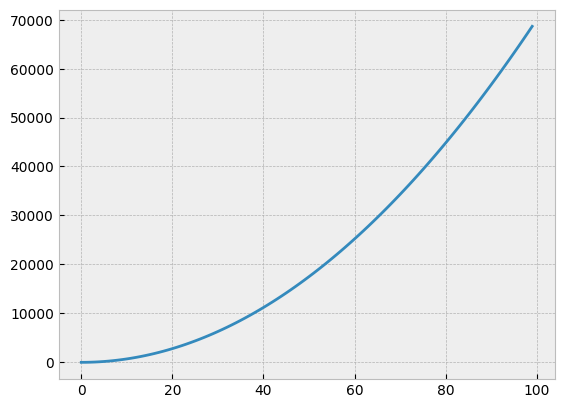

In [2]:
x = np.arange(0,100,1)
y = np.arange(0,50,0.50)
c = 10
z = 6*x**2 + 2*x*y + c
plt.plot(x,z)

[97 50 20 97 25 41 57 41  1 24 94 29 35 89 50 94 50 39 98 36]
[81 85 61 60 68 73 53 54 84 67 67 98 96 58 81 64 89 78 72 90]


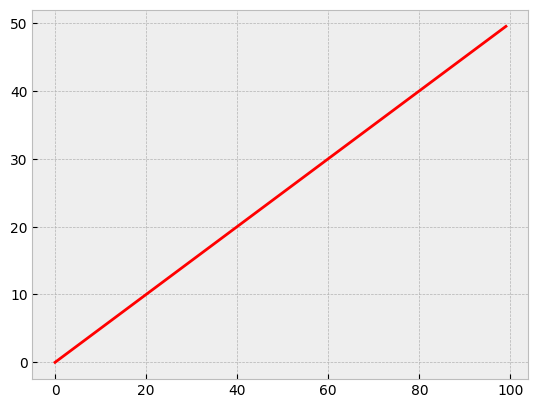

In [3]:
x_train = np.random.randint(1,100,20)
y_train = np.random.randint(50,100,20)
print(x_train); print(y_train)
plt.plot(x,y,c='red')

In [4]:
# cost function

def cost_function(x,y,w,b):
    cost_sum = 0
    m = x.shape[0]
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1/(2*m)) * cost_sum
    
    return total_cost

cost_function(x_train, y_train,10,5)

153519.975

In [5]:
# gradient descent for linear regression

from copy import deepcopy
from sympy import comp


def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = f_wb - y[i] * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    return dj_dw/m, dj_db/m

#compute_gradient(x_train,y_train,10,5)

def gradient_descent(x, y, w_in, b_in, alpha, cost_function, gradient_function, num_iters):
    w = deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i<10000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
    return w,b,J_history,p_history

In [6]:
w_initial = 0
b_initial = 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, cost_function, compute_gradient, iterations)
print(f'{w_final},{b_final},{J_history},{p_history}')

6950.604104372074,-367069.395895573,[2572350.2953864816, 5569046.046316259, 7338396.628588157, 8249834.974500797, 8707152.453827789, 8944030.384396335, 9077587.474955086, 9163537.239302283, 9227814.650153799, 9282378.701734265, 9332720.516307136, 9381356.57707821, 9429439.136088846, 9477495.577588378, 9525767.240016554, 9574364.553620858, 9623338.046290105, 9672710.836790029, 9722493.502852235, 9772690.884157179, 9823305.195012314, 9874337.448527697, 9925788.10822816, 9977657.386187559, 10029945.379434315, 10082652.132360846, 10135777.665277459, 10189321.987476416, 10243285.103209052, 10297667.01442039, 10352467.722000308, 10407687.226355916, 10463325.527673475, 10519382.626038201, 10575858.521489076, 10632753.21404394, 10690066.703710956, 10747798.990493843, 10805950.074394325, 10864519.955413168, 10923508.633550743, 10982916.108807206, 11042742.381182637, 11102987.450677067, 11163651.317290511, 11224733.981022974, 11286235.441874461, 11348155.699844977, 11410494.754934521, 11473252.6

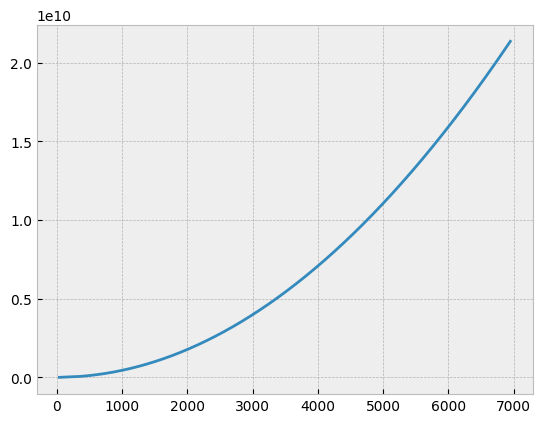

In [7]:
p_history_w = [p[0] for p in p_history]
p_history_b = [p[1] for p in p_history]
plt.plot(p_history_w,J_history)

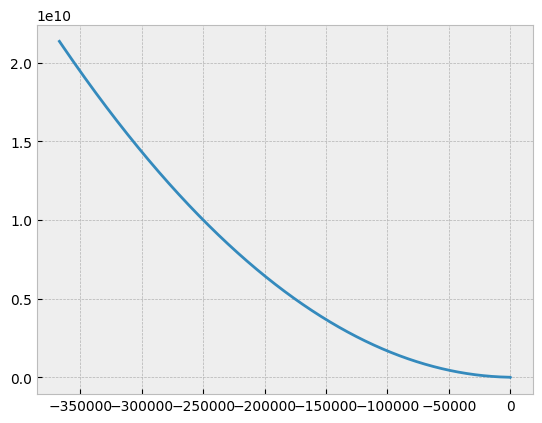

In [8]:
plt.plot(p_history_b, J_history)
plt.xlabel = 'change of bias'
plt.ylabel = 'cost_function'
plt.show()

In [9]:
# vector creation

## zeros array
print(np.zeros(10))

## random sample range 0-1
print(np.random.random_sample(10))

## random sample floats
print(np.random.rand(5))

## random sample integers
print(np.random.randint(5,10, 5))

## array containing numbers within a range from and two are arguements
print(np.arange(5, 10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.55745205 0.66578231 0.01239483 0.05242133 0.5512324  0.49202383
 0.69660378 0.9024216  0.6963963  0.56655903]
[0.33027178 0.242436   0.68632736 0.51354699 0.98313892]
[9 5 5 5 9]
[5 6 7 8 9]


In [10]:
# operations on numpy arrays

""" numpy arrays can be sliced just like normal arrays """
a = np.arange(10)

numpy_operations = [
np.sum(a),
np.multiply(a, 10),
np.mean(a),
np.square(a),
np.sqrt(a)]

for operation in numpy_operations:
    print(operation)

# dot operation

a = np.arange(10)
b = np.arange(10,20)

## manually
def dot_operation(a,b):
    x = 0
    for i in range(len(a)):
        x += a[i] * b[i]
    return x

print(dot_operation(a,b), np.dot(a,b))

w = np.array([10])
print(np.dot(a[9],w))

45
[ 0 10 20 30 40 50 60 70 80 90]
4.5
[ 0  1  4  9 16 25 36 49 64 81]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
735 735
[90]


In [11]:
## numpy matrices
print(np.zeros((2,5)))
print(np.random.random_sample((2,5)))
print(np.arange(6))
print(np.arange(6).reshape(3,2))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.0330803  0.91077671 0.13711665 0.74345102 0.5459585 ]
 [0.37645632 0.27535948 0.52346464 0.37547808 0.69945959]]
[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]


In [12]:
# multiple variable linear regression

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(X_train.shape, y_train.shape)

# constant b, and random weights
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(b_init, w_init)

# model prediction with multiple parameters

# single prediction without using vectorization np.dot()
def single_prediction1(x,w,b):
    n = x.shape[0]
    f_w = f_wb = 0
    for i in range(n):
        f_w_i = x[i] * w[i]
        f_w += f_w_i
    f_wb = f_w + b
    return f_wb

print('without np',single_prediction1(X_train[0], w_init, b_init))

# single prediction using vectorization np.dot()

def single_prediction2(x,w,b):
    return np.dot(x,w) + b

print('with np',single_prediction2(X_train[0], w_init, b_init))

(3, 4) (3,)
785.1811367994083 [  0.39133535  18.75376741 -53.36032453 -26.42131618]
without np 459.9999976194083
with np 459.9999976194083


In [13]:
# compute cost with multiple variables

def compute_cost_mulvar(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost = cost / (2*m)
    return cost
print('cost multi var',compute_cost_mulvar(X_train, y_train, w_init, b_init))

def gradientMulVar(x,y,w,b):
    m,n = x.shape # number of examples and number of features in each example
    dj_dw = np.zeros(n) # derivative for each feature
    dj_db = 0
    for i in range(m): # range is for 3 in this case for each feature
        error = (np.dot(x[i],w) + b) - y[i]
        
        for j in range(n): # range is for 4 for every example in a feature
            
            dj_dw[j] += error * x[i,j] # calculate the partial derivative for each weight
        dj_db += error # partial derivative for bias
        
    dj_dw /= m # average derivative w
    dj_db /= m # average derivative b
    
    return dj_dw, dj_db
gradientMulVar(X_train, y_train, w_init, b_init)

print('der_weights, der_bias',gradientMulVar(X_train, y_train, w_init, b_init))

# gradient descent with multiple variables

def gradientDescentMulVar(x,y,w_in,b_in,alpha,cost_function,gradient_function,num_iters):
    J_history = []
    w = copy.deepcopy(w_in) # avoid modifying global w variable
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha *dj_dw
        b = b - alpha *dj_db
    
    # save history and pervent resource exhaustion
        if i<10000: J_history.append(cost_function(x,y,w,b)) 
    return w,b,J_history

final_weight, final_bias, cost_history = gradientDescentMulVar(X_train, y_train, w_init, b_init, 5.0e-7, compute_cost_mulvar, gradientMulVar, 10000)

print(f'final weight and bias: {final_weight, final_bias}')

cost multi var 1.5578904428966628e-12
der_weights, der_bias (array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]), -1.6739251501955248e-06)
final weight and bias: (array([  0.39133535,  18.75376741, -53.36032453, -26.42131618]), 785.1811367994089)


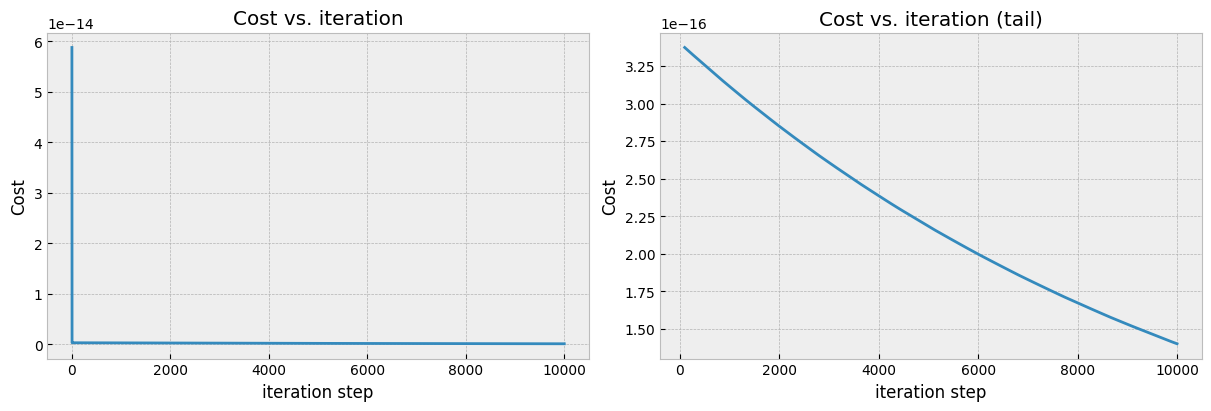

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [15]:
# feature scaling and learning rate

house_data = pd.read_csv(r'C:\Users\chand\Desktop\Prep\AI ML\datasets\Housing.csv')
print(house_data.shape)
house_data.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


TypeError: 'str' object is not callable

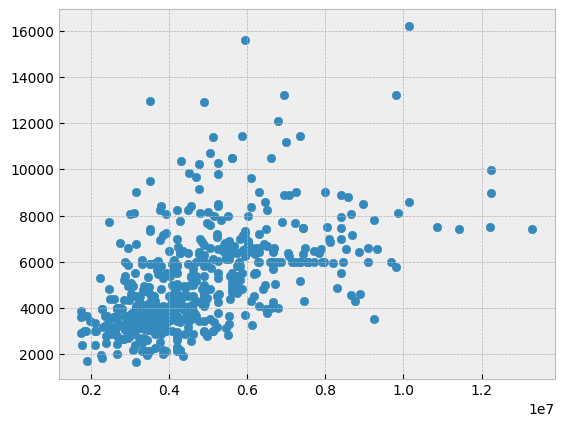

In [17]:
plt.scatter(house_data['price'], house_data['area'])
plt.xlabel(xlabel='price')
plt.ylabel(ylabel='area')
plt.show()

In [18]:
""" since many features in the dataset have 'yes and no' and other char/words, we need to transform them into numbers
    before feeding them into the model """ 

# method 1: applymap() used with a function
# applymap is used for every element of the df and apply is used for a column.
def convertYesNo(val):
    if val == 'yes':
        return 1
    elif val == 'no':
        return 0
    else:
        return val
house_data = house_data.applymap(convertYesNo)

# method 2: using replace()
house_data.replace({'yes':1, 'no':0}, inplace=True)

# method 3: using map()
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
house_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


In [19]:
X_train = np.array(house_data.iloc[:, 1:].values)
y_train = np.array(house_data['price'].values)
print('x train',X_train, 'y_train',y_train)

x train [[7420    4    2 ...    2    1    2]
 [8960    4    4 ...    3    0    2]
 [9960    3    2 ...    2    1    1]
 ...
 [3620    2    1 ...    0    0    0]
 [2910    3    1 ...    0    0    2]
 [3850    3    1 ...    0    0    0]] y_train [13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  661500

In [20]:
w_init = np.zeros(X_train.shape[1])
b_init = 1
alpha = 9e-7
final_weight, final_bias, cost_history = gradientDescentMulVar(X_train,y_train,w_init,b_init,alpha,compute_cost_mulvar, gradientMulVar,10)

In [21]:
# feature scaling

# z-score normalization

def z_score_norm(x):
    mu = np.mean(x)
    sigma = np.std(x)
    return (x - mu)/sigma

X_norm = z_score_norm(X_train)

# gradient descent with normalized features
final_weight, final_bias, cost_history = gradientDescentMulVar(X_norm,y_train,w_init,b_init,alpha,compute_cost_mulvar, gradientMulVar,10)

In [22]:
# feature engineering and polynomial regression

x = np.arange(0,20,1)
Y = 1 + x**2
X = x.reshape(-1,1) # -1 means an undefined value for rows, and 1 column


# target y variable

y = 1 + x*2

X = np.c_[x, x**2, x**3]
X = z_score_norm(X) # normalize
X

array([[-0.44231709, -0.44231709, -0.44231709],
       [-0.44163239, -0.44163239, -0.44163239],
       [-0.44094769, -0.43957829, -0.43683948],
       [-0.44026299, -0.43615478, -0.42383015],
       [-0.43957829, -0.43136187, -0.3984962 ],
       [-0.43889358, -0.42519956, -0.35672942],
       [-0.43820888, -0.41766784, -0.29442159],
       [-0.43752418, -0.40876672, -0.20746452],
       [-0.43683948, -0.3984962 , -0.09174998],
       [-0.43615478, -0.38685628,  0.05683021],
       [-0.43547008, -0.37384695,  0.24238429],
       [-0.43478538, -0.35946822,  0.46902044],
       [-0.43410067, -0.34372009,  0.74084689],
       [-0.43341597, -0.32660256,  1.06197184],
       [-0.43273127, -0.30811562,  1.43650349],
       [-0.43204657, -0.28825928,  1.86855006],
       [-0.43136187, -0.26703354,  2.36221976],
       [-0.43067717, -0.24443839,  2.92162078],
       [-0.42999247, -0.22047384,  3.55086135],
       [-0.42930776, -0.19513989,  4.25404967]])

In [23]:
# scikit-learn

# normalize house data
scaler = StandardScaler()
X_train = np.array(house_data.iloc[:, 1:].values)
X_norm = scaler.fit_transform(X_train)

# create and fit the regression model

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr.n_iter_, sgdr.t_) # number of iterations and number of weight updates

# view parameters

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

# predict
print('\n\n')
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"\n\nPrediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

17 9266.0
model parameters:                   w: [532696.73799778  90473.23399153 496117.2039615  388060.02175734
 148680.96164551 123558.03631499 170991.07449671 177131.81147205
 397641.49276054 241150.56116425 272186.92441418 158501.73002895], b:[4763562.06639398]



prediction using np.dot() and sgdr.predict match: True


Prediction on training set:
[ 8192461.04512694 10633168.59813751  7540496.50662779  8402905.27321628]
Target values 
[13300000 12250000 12250000 12215000]


In [26]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_norm, y_train)

LogisticRegression()

## Course 2

In [2]:
# neural networks

# one neuron
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

# get the weights for the neuron
linear_layer.get_weights()

""" there are not weights as the weights are not instantantized """

X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

a1 = linear_layer(X_train[0].reshape(1,1))
print('output of the nn in the first pass: ',a1) # we're converting arrays into tensors for processing into a nn

w,b = linear_layer.get_weights()
print('random initialized weights: ',w,b)

# setting manual weights

set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(f'manual weights: {linear_layer.get_weights()}')

# compare first forward pass with manual forward propogation

print(f'nn forward pass:{linear_layer(X_train[0].reshape(1,1))}')
print(f'manual f prop: {np.dot(X_train[0].reshape(1,1), set_w) + set_b}')

# comparision using all data

print(f'nn: {linear_layer(X_train)}')
print(f'manual: {np.dot(X_train, set_w) + set_b}')

output of the nn in the first pass:  tf.Tensor([[1.275561]], shape=(1, 1), dtype=float32)
random initialized weights:  [[1.275561]] [0.]
manual weights: [array([[200.]], dtype=float32), array([100.], dtype=float32)]
nn forward pass:[[300.]]
manual f prop: [[300.]]
nn: [[300.]
 [500.]]
manual: [[300.]
 [500.]]


In [3]:
# neuron with sigmoid

X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

pos = Y_train == 1
neg = Y_train == 0

model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)
print(model.summary())

logistic_layer = model.get_layer('L1')
print(logistic_layer.get_weights())

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

print(model.predict(X_train[0].reshape(1,1)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
[array([[0.85657465]], dtype=float32), array([0.], dtype=float32)]
[array([[200.]], dtype=float32), array([100.], dtype=float32)]
1/1 [==============================] - 0s 129ms/step
[[1.]]


In [4]:
house_data = pd.read_csv(r'C:\Users\chand\Desktop\Prep\AI ML\datasets\Housing.csv')
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house_data.replace({'yes':1, 'no':0}, inplace=True)

house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [6]:
X_train = np.array(house_data.loc[:, house_data.columns != 'price'])
y_train = np.array(house_data['price'])
print(X_train.shape, y_train.shape)

(545, 12) (545,)


In [7]:
# normalize data
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_norm = norm_l(X_train)

tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(12,)),
        Dense(4, activation='relu', name = 'layer1'),
        Dense(2, activation='relu', name = 'layer2'),
        Dense(1, activation='linear', name = 'layer3')
    ]
)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 52        
                                                                 
 layer2 (Dense)              (None, 2)                 10        
                                                                 
 layer3 (Dense)              (None, 1)                 3         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.fit(
    X_norm,y_train,            
    epochs=10,
)

Epoch 1/10
18/18 [==============================] - 1s 2ms/step - loss: 26213831671808.0000
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 26213831671808.0000
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 26213831671808.0000
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 26213827477504.0000
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000
Epoch 10/10
18/18 [==============================] - 0s 2ms/step - loss: 26213829574656.0000


In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 0.23836818  0.2088037  -0.49026495  0.4816022 ]
 [-0.40436456  0.44986254  0.6603063   0.02574588]
 [ 0.2653039   0.2943296   0.10211962 -0.44851032]
 [ 0.49932888  0.3942034   0.68360734 -0.7569716 ]
 [-0.40393388  0.12041088 -0.07164939  0.7661559 ]
 [-0.11587613  0.02434958 -0.2855649  -0.19335361]
 [ 0.11152545 -0.33836898  0.27634293 -0.34911916]
 [-0.083647   -0.2644104  -0.45998073  0.4436017 ]
 [-0.2560311  -0.44671118  0.10849603 -0.22523534]
 [-0.40459633 -0.18227512  0.41779217  0.20460966]
 [-0.1356526  -0.476203    0.65148264 -0.3677521 ]
 [-0.44721434  0.50092864  0.65149826 -0.4556426 ]] 
b1: [-0.18480344 -0.12653083  0.14553101  0.18800321]
W2:
 [[-0.39330497 -0.64880604]
 [-0.62005424 -0.36847678]
 [-0.6278147   0.42427814]
 [ 0.88085216 -0.8510391 ]] 
b2: [0.21084969 0.15434428]


In [10]:
# multi class classification
from sklearn.datasets import make_blobs
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)


In [11]:
X_train.shape

(100, 2)

In [12]:
# clustering model
model = Sequential(
    [
        Dense(2, activation='relu', name = 'layer1'),
        Dense(4, activation='linear', name = 'layer2'),
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2753
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1847
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1148
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0554
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0050
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9561
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9148
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8749
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8403
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8053
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7748
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [13]:
# model evaluation and selection

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [14]:
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [15]:
data = np.loadtxt(r'C:\Users\chand\Desktop\Prep\AI ML\datasets\data_w3_ex1.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

print(f'before conversion: {x.shape, y.shape}')

# convert 1d array into 2d array
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

# after conversion
print(f'after conversion: {x.shape, y.shape}')

before conversion: ((50,), (50,))
after conversion: ((50, 1), (50, 1))


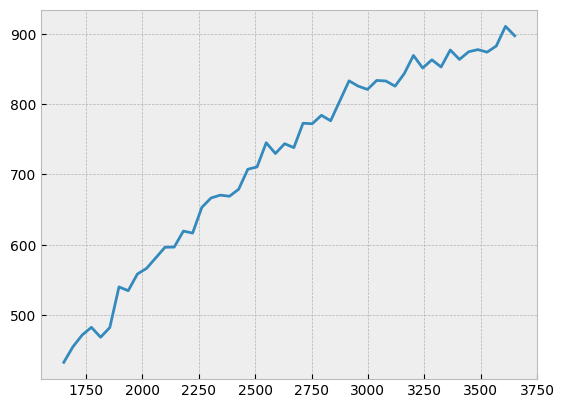

In [16]:
plt.plot(x,y)

In [17]:
# splitting the dataset into training, cross validation, and test sets
x_train,x_,y_train,y_ = train_test_split(x,y, test_size=0.40, random_state=1)

# split the 40% into testing and validation
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# delete temporary variables
del x_, y_

In [18]:
# fit linear model

scaler_linear = StandardScaler()

# compute the mean and standard deviation of the training set and then transform it
X_scaled = scaler_linear.fit_transform(x_train)

linear_model = LinearRegression()

linear_model.fit(X_scaled, y_train)

LinearRegression()

In [19]:
yhat = linear_model.predict(X_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533155
training MSE (for-loop implementation): 406.19374192533155


In [20]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


In [21]:
# adding features to the data
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)

# scaler class
scaler_poly = StandardScaler()
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)

# class for linear regression
model = LinearRegression()

# training
model.fit(x_train_mapped_scaled, y_train)

# compute MSE
y_hat = model.predict(x_train_mapped_scaled)
print(y_hat)

[[861.76]
 [668.52]
 [876.81]
 [743.1 ]
 [733.37]
 [490.2 ]
 [816.95]
 [631.97]
 [795.09]
 [578.93]
 [778.98]
 [873.51]
 [823.62]
 [680.1 ]
 [702.32]
 [752.53]
 [521.  ]
 [535.95]
 [882.5 ]
 [441.7 ]
 [656.64]
 [424.92]
 [644.46]
 [505.76]
 [592.65]
 [564.91]
 [550.58]
 [606.06]
 [869.9 ]
 [841.8 ]]


In [45]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

In [23]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [24]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


In [43]:
# neural networks

# add polynomial features and select the best model

nn_mse_err = []
nn_cv_mse_err = []

# build the models
def build_models():
    model_1 = Sequential(
            [
                Dense(25, activation = 'relu'),
                Dense(15, activation = 'relu'),
                Dense(1, activation = 'linear')
            ],
            name='model_1'
        )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

nn_models = build_models()

In [49]:
for model in nn_models:
    model.compile(
        loss = 'mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
    )
    
    print(f'Training: {model.name}')
    
    model.fit(
        x_train_mapped_scaled, y_train,
        epochs = 200,
        verbose = 0
    )
    
    print(f'Done training {model.name}')
    
    #yhat = model.predict(X_train_mapped_scaled)
    # train_mse = mean_squared_error(y_train, yhat) / 2
    # nn_mse_err.append(train_mse)
    
    # # Record the cross validation MSEs 
    # yhat = model.predict(X_cv_mapped_scaled)
    #cv_mse = mean_squared_error(y_cv, yhat) / 2
    #nn_cv_mse_err.append(cv_mse)

    
# print results
print("RESULTS:")
# for model_num in range(len(nn_mse_err)):
#     print(
#         f"Model {model_num+1}: Training MSE: {nn_mse_err[model_num]:.2f}, " +
#         f"CV MSE: {nn_cv_mse_err[model_num]:.2f}"
#         )

Training: model_1
Done training model_1
Training: model_2
Done training model_2
Training: model_3
Done training model_3
RESULTS:


### Week 4 Decision Trees

In [2]:
# pointy ears, round face, whiskers

X_train = np.array([[1, 1, 1],
[0, 0, 1],
[0, 1, 0],
[1, 0, 1],
[1, 1, 1],
[1, 1, 0],
[0, 0, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

information gain
$$ H(P1node) - (Wleft * H (P1left) + wright * H(P1right)) $$

H -> Entropy

$$ H(P1) = P1log(P1) - (1-P1)log(1-P1) $$

In [25]:
def entropy(p):
    if p == 0 or p == 1: return 0
    else: return -p * np.log2(p) - (1-p) * np.log2(1-p)

# entropy(0.5)

def splitIndices(X, index_feature):
    left_indices = []
    right_indices = []
    for i, x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

#splitIndices(X_train, 0)

def weighedEntropy(X,y, left_indices, right_indices):
    lenX = len(X)
    w_left = len(left_indices)/lenX
    w_right = len(right_indices)/lenX
    p_left = sum(y[left_indices]/len(left_indices))
    p_right = sum(y[right_indices]/len(right_indices))
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

left_indices, right_indices = splitIndices(X_train, 0)
# weighedEntropy(X_train, y_train, left_indices, right_indices)

""" we are aiming for the least weighted entropy for the most information gain """

def informationGain(X, y, left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighedEntropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

informationGain(X_train, y_train, left_indices, right_indices)

""" computing information gain for each feature and selecting one to split on """

for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = splitIndices(X_train, i)
    i_gain = informationGain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


## Course 3

In [66]:
import random
from itertools import pairwise
cluster_df = [[a,b] for a,b in pairwise(random.uniform(1,10) for _ in range(301))]
cluster_df = np.array(cluster_df)
cluster_df.shape

(300, 2)

In [71]:
# k means algorithm

def findClosestCentroid(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = findClosestCentroid(cluster_df, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

def computeCentriods(X, idx, K):
    m,n = X.shape
    centriods = np.zeros((K,n))
    for k in range(K):
        points = X[idx == k]
        centriods[k] = np.mean(points, axis=0)
    return centriods

K = 3
centroids = computeCentriods(cluster_df, idx, K)
print(f'the centriods are: {centroids}')

First three elements in idx are: [1 0 2]
the centriods are: [[2.57926912 5.55841878]
 [6.40930204 2.2383033 ]
 [7.4095471  7.01540388]]


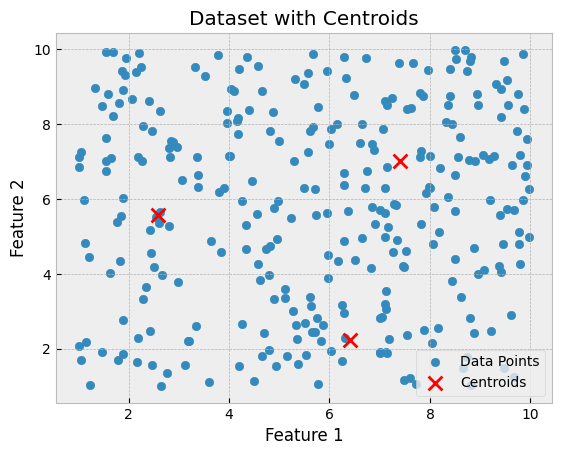

In [72]:
# Scatter plot of the dataset
plt.scatter(cluster_df[:, 0], cluster_df[:, 1], label='Data Points')

# Scatter plot of centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Labeling axes and adding legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Centroids')
plt.legend()

# Show plot
plt.show()

In [33]:
# anomaly detection

import numpy as np
from sklearn.datasets import make_blobs

# Generate a dataset with clusters of normal data
X_train, y_train = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Adding anomalies to the validation set
X_val, y_val = make_blobs(n_samples=10, centers=1, n_features=2, random_state=42)

# Concatenate the generated data with anomalies
X_val = np.vstack([X_val, np.random.uniform(low=-10, high=10, size=(300, 2))])
y_val = np.hstack([y_val, np.ones(300)])  # Assuming anomalies are labeled as 1

# Print the shapes of the datasets
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_val is: {X_val.shape}")
print(f"The shape of y_val is: {y_val.shape}")


The shape of X_train is: (300, 2)
The shape of X_val is: (310, 2)
The shape of y_val is: (310,)


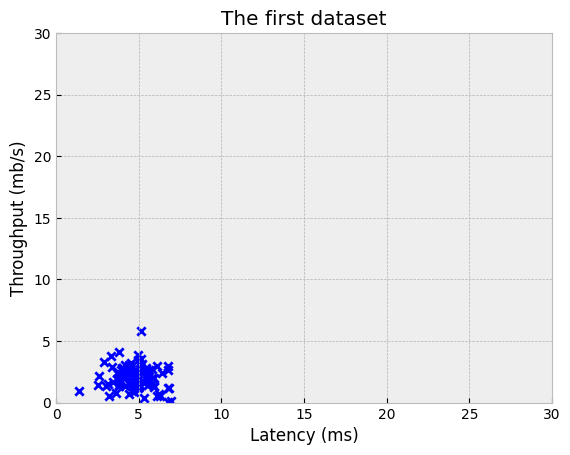

In [34]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

In [41]:
def estimateGaussian(X):
    # conmpute mu and variance
    m = X.shape[0]
    mu = 1/m * np.sum(X, axis=0)
    var = 1/m * np.sum((X - mu) ** 2, axis=0)
    return mu, var

mu, var = estimateGaussian(X_train)
print(f'mu:{mu}, variance:{var}')

""" we use f1 score to calculate the optimal threshold """

def selectAnomalyThreshold(y_val, p_val):
    # validation set results p_val
    # ground truth y_val
    # returns epsilon (threshold value), f1 (f1 score for epsilon)
    
    best_epsilon = 0
    best_f1 = 0
    F1 = 0
    step_size = (max(p_val) - min(p_val)) /1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        predictions = (p_val < epsilon)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        
        if F1 > best_f1:
            best_f1 = F1
            best_epsilon = epsilon
    return best_epsilon, best_f1


def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = selectAnomalyThreshold(y_val, p_val)
print(p_val, F1, epsilon)

mu:[-1.59000036  1.35672664], variance:[24.04031105 43.96750376]
[0.00254451 0.00293087 0.00219891 0.00333178 0.00261258 0.00259603
 0.00187439 0.00218912 0.00238781 0.00216416 0.00070731 0.00039169
 0.00137641 0.00172328 0.00207029 0.00222008 0.00166515 0.00262287
 0.00049122 0.00040617 0.00033873 0.00030921 0.0012038  0.00137176
 0.00172957 0.00338034 0.00056326 0.00207165 0.00233291 0.00432342
 0.00114025 0.00026718 0.00441095 0.00075609 0.00145465 0.00246069
 0.00074039 0.00134222 0.00036955 0.00265722 0.00070513 0.00404289
 0.00245265 0.00074706 0.00410965 0.00383868 0.00299525 0.00470053
 0.00022318 0.00153888 0.00173235 0.00140733 0.00266797 0.00318715
 0.00291723 0.00140668 0.00111653 0.00178106 0.00158601 0.00238091
 0.00414382 0.00346321 0.00269514 0.00200773 0.00205323 0.00116199
 0.0021249  0.00173511 0.00100544 0.00143227 0.00134088 0.0044877
 0.0017537  0.00037562 0.00234197 0.00141702 0.00037607 0.00139547
 0.00173722 0.00437919 0.00045907 0.00362601 0.00053895 0.0029999

C:\Users\chand\AppData\Local\Temp\ipykernel_5148\832961358.py:28: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)
